In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('movie_data.csv')[0:10000]
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [4]:
df.describe()

,sentiment
count,10000.000000
mean,0.504300
std,0.500007
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

8

In [7]:
df.drop_duplicates(inplace=True,keep='first')

In [8]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='count', ylabel='sentiment'>

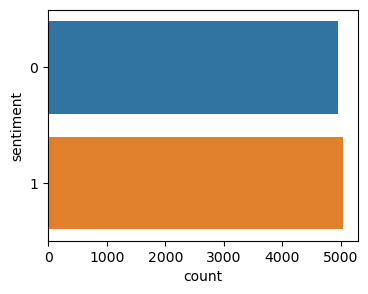

In [9]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,y='sentiment')

In [10]:
for i in range(10):
    print(df['review'][i],'------------',df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
def preprocess(sentence):
    text=re.sub(r"[^0-9A-Za-z]",' ',sentence).split()
    
    text=[i.lower() for i in text if i not in stopwords.words('english')]
    
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(x,'v') for x in text]
    
    return ' '.join(text)

In [13]:
df['review']=df['review'].apply(preprocess)

In [14]:
for i in range(10):
    print(df['review'][i],'------------',df['sentiment'][i])
    print()

this movie crap even though directors claim part oi culture still bad directorial debut the topic interest i accept bad act due fact amateurs never act worst thing film dialogs unexperienced naive direct there time movie i felt like directors exit movie first feature actually never really ask story wanna tell i meet ben one directors several occasion nice thoughtful guy make director i think american history x full clich somehow manage transport story oi warn full clich tell anything new provocative sad thing movie far oi reality br br if wanna see weird great german film watch movies michael haneke christoph schlingensief oskar roehler hans weingartner oliver hirschbiegel br br benny video funny game die unber hrbare mein letzter film das experiment das weisse rauschen muxm uschenstill br br ten topic photography ------------ 0

another detail work subject dr dwivedi take us back time pre partioned panjab dr dwivedi choose difficult subject movie debut he work meticulous detail bring 

In [15]:
x=df['review']
y=df['sentiment']

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer=Tokenizer(num_words=10000)

In [18]:
tokenizer.fit_on_texts(x)

In [19]:
vocab_size=len(tokenizer.word_index)+1

In [20]:
tokenizer

In [21]:
def encoding(txt):
    encoded=tokenizer.texts_to_sequences(txt)
    
    padded=pad_sequences(encoded,maxlen=128)
    
    return padded

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [24]:
x_train=encoding(x_train)
x_test=encoding(x_test)

In [25]:
from tensorflow.keras import Sequential,layers

In [26]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         5614720   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,epochs=15,validation_split=0.10)

Epoch 1/15
211/211 [==============================] - 223s 1s/step - loss: 0.5060 - accuracy: 0.7421 - val_loss: 0.4179 - val_accuracy: 0.8067
Epoch 2/15
211/211 [==============================] - 240s 1s/step - loss: 0.2553 - accuracy: 0.9027 - val_loss: 0.4366 - val_accuracy: 0.8333
Epoch 3/15
211/211 [==============================] - 233s 1s/step - loss: 0.1133 - accuracy: 0.9625 - val_loss: 0.5796 - val_accuracy: 0.8107
Epoch 4/15
211/211 [==============================] - 229s 1s/step - loss: 0.0523 - accuracy: 0.9827 - val_loss: 0.5637 - val_accuracy: 0.8293
Epoch 5/15
211/211 [==============================] - 227s 1s/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.7317 - val_accuracy: 0.7973
Epoch 6/15
211/211 [==============================] - 228s 1s/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.9274 - val_accuracy: 0.8173
Epoch 7/15
211/211 [==============================] - 231s 1s/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.8692 - val_accuracy: 0.8307

In [30]:
y_pred=model.predict(x_test)

79/79 [==============================] - 24s 249ms/step


In [31]:
predicted=[]

for i in y_pred:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
accuracy_score(y_test,predicted)

0.8254603682946358

<AxesSubplot:>

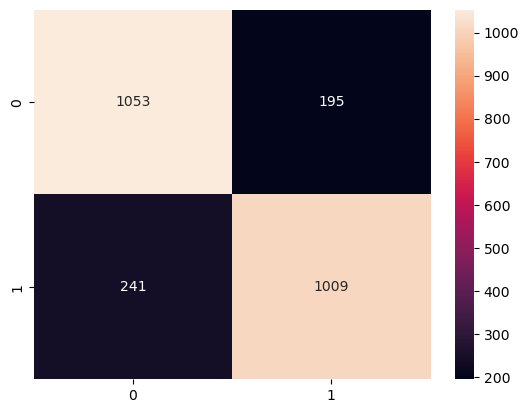

In [34]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [35]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1248
           1       0.84      0.81      0.82      1250

    accuracy                           0.83      2498
   macro avg       0.83      0.83      0.83      2498
weighted avg       0.83      0.83      0.83      2498

